## 1. Main Research Topic

In this project, I analyze AoA statistics for roughly 30,000 English and 30,000 Dutch words. I research

## 2. Used Data Sources

In my investigation of the main research question, I imported .xlsx data from web.archiv that was used the following two articles:


https://web.archive.org/web/20230208143006/http://crr.ugent.be/programs-data/word-ratings

1. [Kuperman, V., Stadthagen-Gonzalez, H., & Brysbaert, M. (2012). Age-of-Acquisition Ratings for 30,000 English Words. *Behav Res*, 44, 978–990](https://web.archive.org/web/20230208135926/http://crr.ugent.be/archives/806)
     
2. [Brysbaert, M., Stevens, M., De Deyne, S., Voorspoels, W., & Storms, G. (2014). Norms of Age of Acquisition and Concreteness for 30,000 Dutch Words. *Acta Psychologica*, 150, 80-84](https://web.archive.org/web/20230208125948/http://crr.ugent.be/archives/1602).

For the academic articles produced from this research, please see the links below:
1. [Kuperman, V., Stadthagen-Gonzalez, H., & Brysbaert, M. (2012). Age-of-Acquisition Ratings for 30,000 English Words. *Behav Res*, 44, 978–990](https://link.springer.com/article/10.3758/s13428-012-0210-4)
2. [Brysbaert, M., Stevens, M., De Deyne, S., Voorspoels, W., & Storms, G. (2014). Norms of Age of Acquisition and Concreteness for 30,000 Dutch Words. *Acta Psychologica*, 150, 80-84](https://www.researchgate.net/publication/262385555_Norms_of_age_of_acquisition_and_concreteness_for_30000_Dutch_words)



## 3. Methodology

***Preparing and Organizing the Data***

In order to query this data and produce relevant results, we exported data from our external sources as CSV files and imported them into an adapted MySQL database that was constructed out of the Mondial database. To enhance our performance and have a more workable, integrated system, we added relevant primary and foreign keys to the imported tables. Due to the limitations of this project and the feedback on the intermediary report, a number of the tables we imported were not utilized during our analysis. Nevertheless, we left them in our database for any future inquiry into our main research topic.

***Analyzing the Data***

***Limitations***

While the Tortoise Media table serves as the basis for measuring each country's success in AI development, it is also limited in its subset of countries. In our investigation, relevant countries outside the scope of the Tortoise Media table were also discovered, calling into question the very criteria they propose. This warrants further investigation into common assumptions and considerations made by Tortoise Media. Nevertheless, considering the limited nature of this research project, such realizations were only noted in this report, not deeply investigated.


## 4. Preparing and Organizing the Data

**Step 1**: Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Step 2**: Opening and reading data files

In [3]:
df_1 = pd.read_excel('Age_of_Acquisition_English.xlsx')

In [4]:
df_2 = pd.read_excel('Age_of_Acquisition_Dutch.xlsx')

**Step 3**: Head and describe data to confirm it is correctly uploaded

*DataFrame 1: Age of Acquisition (English)*

In [5]:
df_1.head()

,Word,OccurTotal,OccurNum,Freq_pm,Rating.Mean,Rating.SD,Dunno
0,a,22,22,20415.274510,2.893384,1.21,1.000000
1,aardvark,18,18,0.411765,9.890000,3.66,1.000000
2,abacus,20,13,0.235294,8.690000,3.77,0.650000
3,abalone,18,13,0.509804,12.230000,3.54,0.722222
4,abandon,19,19,8.098039,8.320000,2.75,1.000000


In [6]:
df_1.describe()

,OccurTotal,OccurNum,Freq_pm,Rating.Mean,Rating.SD,Dunno
count,31124.000000,31124.000000,30387.000000,31105.000000,31046.000000,31124.000000
mean,22.918519,20.439115,25.544835,11.000033,3.187698,0.873487
std,85.072469,84.271333,499.087837,3.044179,0.904152,0.198555
min,15.000000,0.000000,0.019608,1.580000,0.000000,0.000000
25%,18.000000,16.000000,0.078431,8.940000,2.570000,0.833333
50%,19.000000,18.000000,0.352941,11.170000,3.110000,0.952381
75%,20.000000,19.000000,1.666667,13.200000,3.730000,1.000000
max,1939.000000,1934.000000,41857.117647,25.000000,9.900000,1.000000


Results: Everything looks good. We therefore can keep it as it is and move to the analysis. There are some interesting statistics already in the Describe, but we will return to other interesting insights shortly.

*DataFrame 2: Age of Acquisition (Dutch)*

In [7]:
df_2.head()

,Word,Translation,Ghyselinck2000,Unnamed: 3,Ghyselinck2003,Unnamed: 5,Moors2013,Unnamed: 7,Brysbaert2014,Unnamed: 9,Average,Unnamed: 11
0,NaN,NaN,AoA,%Known,AoA,%Known,AoA,%Known,AoA,%Known,AoA,%Known
1,mama,NaN,2.25,100,2,100,2.4,100,1.527027,100,2.044257,100
2,ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.25,100,2.25,100
3,mamma,NaN,1.915094,98.148148,NaN,NaN,NaN,NaN,2.75,88.888889,2.332547,93.518519
4,papa,NaN,2.138889,100,2.2,100,2.5875,100,2.418919,100,2.336327,100


Unfortunately, there seems to be a small problem with this dataset. The excel file, at times, uses one title for two columns, making the data slightly messy. Moreover, Record #1 does not belong in the data set and should be used as column headers instead. Therefore, some of the headers  need to be renamed and the first record dropped.

In [8]:
df_2.rename(columns={'Ghyselinck2000': 'Ghyselinck_2000_AoA', 'Unnamed: 3': 'Ghyselinck_2000_%_Known',
                    'Ghyselinck2003': 'Ghyselinck_2003_AoA', 'Unnamed: 5': 'Ghyselinck_2003_%_Known',
                    'Moors2013': 'Moors_2013_AoA', 'Unnamed: 7': 'Moors_2013_%_Known',
                    'Brysbaert2014': 'Brysbaert_2014_AoA', 'Unnamed: 9': 'Brysbaert_2014_%_Known' ,
                    'Average': 'Average_AoA', 'Unnamed: 11':'Average_%_Known',
                    }, inplace=True)
df_2.drop(0, inplace=True)
df_2.reset_index(drop=True, inplace=True)

In [9]:
df_2.head()

,Word,Translation,Ghyselinck_2000_AoA,Ghyselinck_2000_%_Known,Ghyselinck_2003_AoA,Ghyselinck_2003_%_Known,Moors_2013_AoA,Moors_2013_%_Known,Brysbaert_2014_AoA,Brysbaert_2014_%_Known,Average_AoA,Average_%_Known
0,mama,NaN,2.25,100,2,100,2.4,100,1.527027,100,2.044257,100
1,ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.25,100,2.25,100
2,mamma,NaN,1.915094,98.148148,NaN,NaN,NaN,NaN,2.75,88.888889,2.332547,93.518519
3,papa,NaN,2.138889,100,2.2,100,2.5875,100,2.418919,100,2.336327,100
4,nee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.555556,100,2.555556,100


In [10]:
df_2.describe()

,Word,Translation,Ghyselinck_2000_AoA,Ghyselinck_2000_%_Known,Ghyselinck_2003_AoA,Ghyselinck_2003_%_Known,Moors_2013_AoA,Moors_2013_%_Known,Brysbaert_2014_AoA,Brysbaert_2014_%_Known,Average_AoA,Average_%_Known
count,31177,5099,2816.0,2816.0,2333.0,2333.0,4299.0000,4299.0,25867.0,25886.0,31161.0,31177.0
unique,31177,4351,2120.0,262.0,136.0,44.0,378.0000,73.0,1440.0,45.0,5171.0,1197.0
top,mama,**********,13.0,100.0,9.5,100.0,7.9625,100.0,10.0,100.0,10.0,100.0
freq,1,68,11.0,1386.0,51.0,1721.0,53.0000,2891.0,285.0,16181.0,284.0,19030.0


Results: This looks much better. Now, to my analysis.

## 5. Analyzing the Data

### English AoA - Kuperman et al

**Category #1 Key Statistics**

*Query #1: Top/Oldest AoA*

In [11]:
df_1.sort_values('Rating.Mean', ascending = False).head()

,Word,OccurTotal,OccurNum,Freq_pm,Rating.Mean,Rating.SD,Dunno
8762,eisteddfod,21,1,NaN,25.0,NaN,0.047619
1344,architrave,19,1,0.039216,21.0,NaN,0.052632
3734,calceolaria,19,2,0.019608,21.0,5.66,0.105263
19898,penury,18,5,0.019608,20.6,1.52,0.277778
19000,oubliette,19,4,0.098039,20.5,4.43,0.210526


*Query #2: Lowest/Youngest AoA*

In [12]:
df_1.sort_values('Rating.Mean', ascending = True).head()

,Word,OccurTotal,OccurNum,Freq_pm,Rating.Mean,Rating.SD,Dunno
17429,momma,19,19,8.078431,1.58,0.69,1.000000
16407,mama,19,19,103.705882,1.89,1.29,1.000000
2069,bantling,21,1,NaN,2.00,NaN,0.047619
17424,mom,18,18,430.392157,2.22,1.22,1.000000
20924,potty,18,18,1.686275,2.28,0.83,1.000000


*Query #5: Average Word Length*

In [13]:
df_1.sort_values(by='Word', key=lambda x: x.str.len(), ascending=False).head()

,Word,OccurTotal,OccurNum,Freq_pm,Rating.Mean,Rating.SD,Dunno
7058,deinstitutionalization,19,19,0.019608,16.05,2.93,1.000000
8806,electroencephalograph,19,13,0.019608,15.85,2.44,0.684211
13374,hypercholesterolemia,22,7,0.019608,17.00,4.16,0.318182
14386,institutionalization,20,18,0.019608,13.44,2.31,0.900000
5330,compartmentalization,19,19,0.039216,13.11,3.73,1.000000


In [14]:
df_1['Word_Length'] = df_1['Word'].apply(lambda x: len(str(x)))

In [16]:
correlation_coefficient = round((df_1['Word_Length'].corr(df_1['Rating.Mean'])),2)
print(f'Correlation Coefficient: {correlation_coefficient}')

Correlation Coefficient: 0.34


**Category #2 Visualizations**

*Query #6: Grouping by First Letter*

In [17]:
df_1['FirstLetter'] = df_1['Word'].str[0].str.lower()
letter_counts = df_1['Word'].groupby(df_1['FirstLetter']).count().reset_index(name='WordCount')

In [18]:
df_1.head()

,Word,OccurTotal,OccurNum,Freq_pm,Rating.Mean,Rating.SD,Dunno,Word_Length,FirstLetter
0,a,22,22,20415.274510,2.893384,1.21,1.000000,1,a
1,aardvark,18,18,0.411765,9.890000,3.66,1.000000,8,a
2,abacus,20,13,0.235294,8.690000,3.77,0.650000,6,a
3,abalone,18,13,0.509804,12.230000,3.54,0.722222,7,a
4,abandon,19,19,8.098039,8.320000,2.75,1.000000,7,a


In [19]:
letter_counts.sort_values('WordCount', ascending = False).head()

,FirstLetter,WordCount
18,s,3377
2,c,3012
15,p,2519
3,d,1889
0,a,1848


<Axes: xlabel='FirstLetter', ylabel='WordCount'>

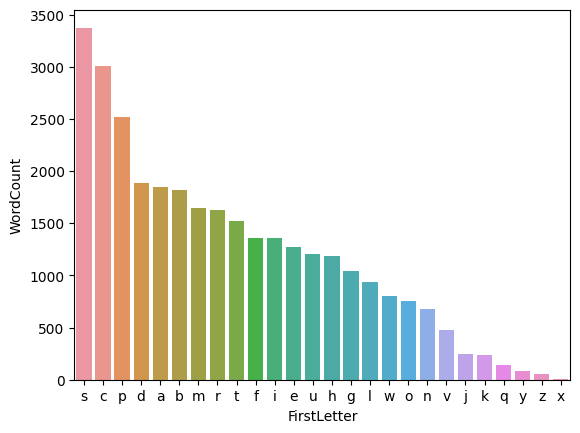

In [20]:
sns.barplot(x='FirstLetter', y='WordCount', data=letter_counts,
            order=letter_counts.sort_values('WordCount', ascending=False)['FirstLetter'])

*Query #7: Words learned per AoA*

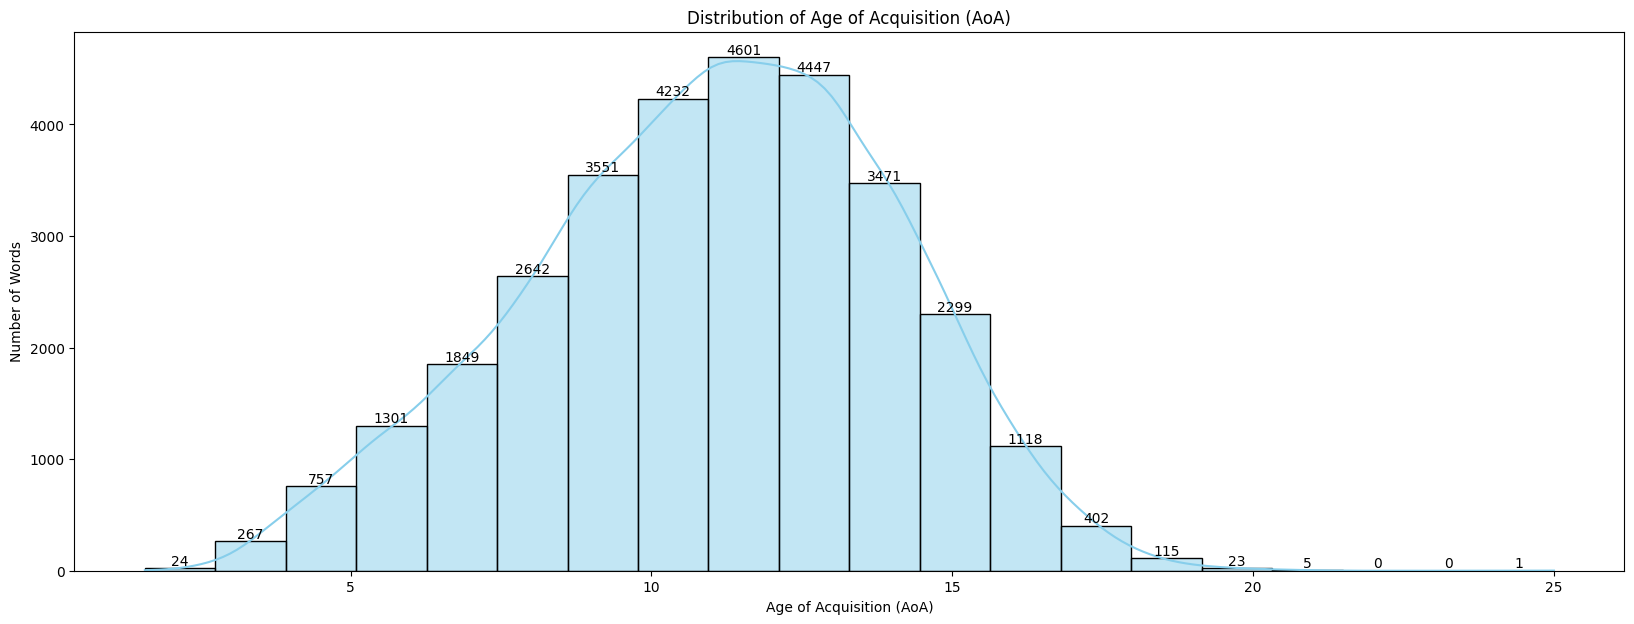

10.95 12.12


In [21]:
# Set the figure size
plt.figure(figsize=(20, 7))

#Create all_words_plot
all_words_plot = sns.histplot(data=df_1, x='Rating.Mean', bins=20, kde=True, color='skyblue')

# Adding counts on top of each bin for all_words_plot
for bar in all_words_plot.patches:
    height = bar.get_height()
    all_words_plot.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

plt.title('Distribution of Age of Acquisition (AoA)')
plt.xlabel('Age of Acquisition (AoA)')
plt.ylabel('Number of Words')
plt.show()

# Find the bin with the highest count
max_bar = max(all_words_plot.patches, key=lambda x: x.get_height())
max_x_coordinate_bottom_left = max_bar.get_x()
max_x_coordinate_bottom_right = max_bar.get_x() + max_bar.get_width()

# Round to two decimal places and print
max_x_coordinate_bottom_left = round(max_x_coordinate_bottom_left, 2)
max_x_coordinate_bottom_right = round(max_x_coordinate_bottom_right, 2)
print(max_x_coordinate_bottom_left, max_x_coordinate_bottom_right)



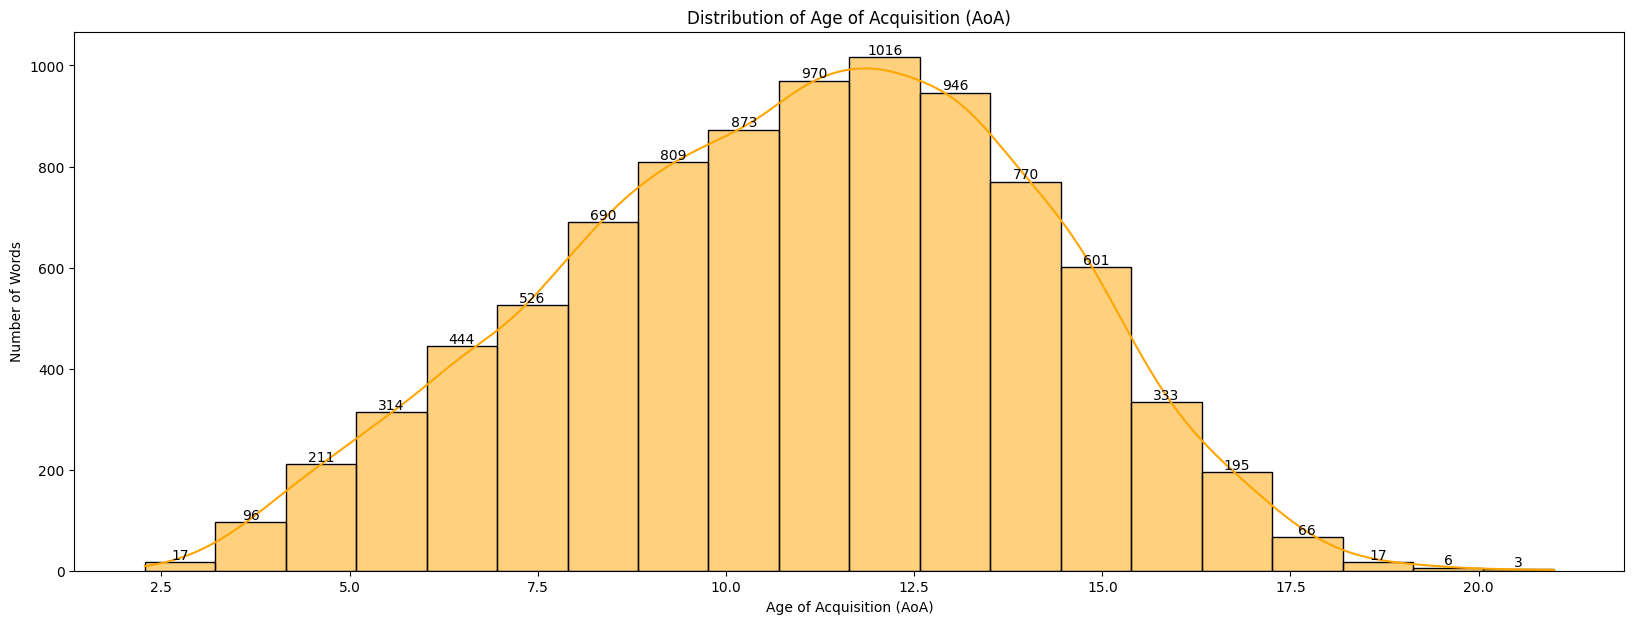

11.64 12.58


In [22]:
# Set the figure size
plt.figure(figsize=(20, 7))

#Create scp_words and scp_words_plot
scp_words = df_1[df_1['FirstLetter'].isin(['s', 'c', 'p'])]
scp_words_plot = sns.histplot(data=scp_words, x='Rating.Mean', bins=20, kde=True, color='orange',
                              label='Words starting with "s", "c", and "p"')

# Adding counts on top of each bin for all_words_plot
for bar in scp_words_plot.patches:
    height = bar.get_height()
    scp_words_plot.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

# Adding plot title and labels
plt.title('Distribution of Age of Acquisition (AoA)')
plt.xlabel('Age of Acquisition (AoA)')
plt.ylabel('Number of Words')
plt.show()

# Find the bin with the highest count for scp_words_plot
max_bin_scp_words = max(scp_words_plot.patches, key=lambda x: x.get_height())
max_x_coordinate_bottom_left_scp_words = max_bin_scp_words.get_x()
max_x_coordinate_bottom_right_scp_words = max_bin_scp_words.get_x() + max_bin_scp_words.get_width()

# Round to two decimal places and print
max_x_coordinate_bottom_left_scp_words = round(max_x_coordinate_bottom_left_scp_words, 2)
max_x_coordinate_bottom_right_scp_words = round(max_x_coordinate_bottom_right_scp_words, 2)
print(max_x_coordinate_bottom_left_scp_words, max_x_coordinate_bottom_right_scp_words)


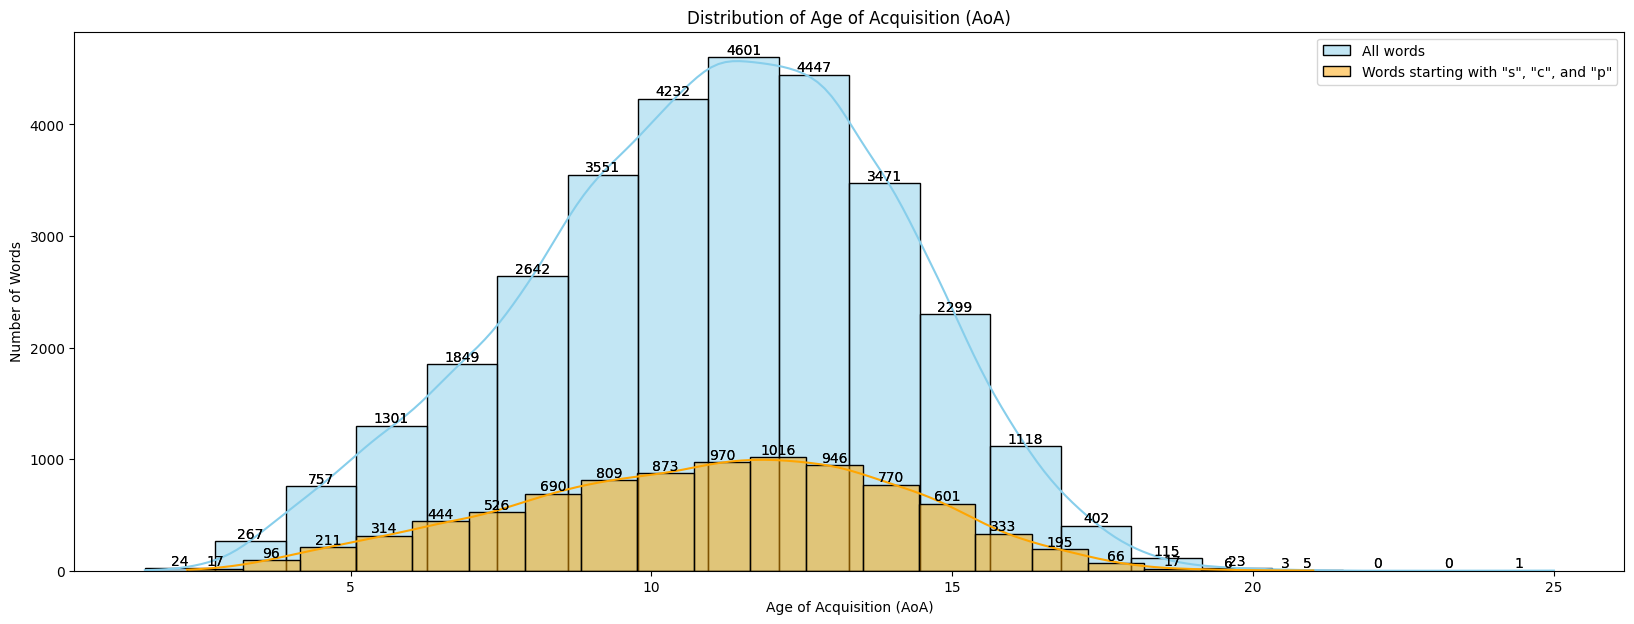

In [23]:
# Set the figure size
plt.figure(figsize=(20, 7))

# Plot for all words
all_words_plot = sns.histplot(data=df_1, x='Rating.Mean', bins=20, kde=True, color='skyblue',
                             label= "All words")

# Plot for 's', 'c', and 'p' words
scp_words_plot = sns.histplot(data=scp_words, x='Rating.Mean', bins=20, kde=True, color='orange',
                              label='Words starting with "s", "c", and "p"')


# Adding counts on top of each bin for all_words_plot
for bar in all_words_plot.patches:
    height = bar.get_height()
    all_words_plot.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

# Adding counts on top of each bin for all_words_plot
for bar in scp_words_plot.patches:
    height = bar.get_height()
    scp_words_plot.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')


# Add a legend
plt.legend()

# Set the title and labels for the axes
plt.title('Distribution of Age of Acquisition (AoA)')
plt.xlabel('Age of Acquisition (AoA)')
plt.ylabel('Number of Words')
plt.show()


*Query #9: Plotting each letter's deviation from overall Rating.Mean*

In [24]:
# Calculate overall Rating.Mean in df_1
overall_mean = df_1['Rating.Mean'].mean()

# Calculate the mean Rating.Mean for each letter grouping
letter_means = round((df_1.groupby('FirstLetter')['Rating.Mean'].mean().reset_index(name='LetterMean')), 2)

# Calculate the deviation from the overall mean
letter_means['Deviation %'] = round((((letter_means['LetterMean'] - overall_mean)/overall_mean)*100), 2)

print(df_1['Rating.Mean'].mean())

print(letter_means)

11.000033067416815
   FirstLetter  LetterMean  Deviation %
0            a       11.75         6.82
1            b       10.38        -5.64
2            c       11.17         1.55
3            d       11.26         2.36
4            e       11.90         8.18
5            f       10.55        -4.09
6            g       10.68        -2.91
7            h       10.65        -3.18
8            i       11.98         8.91
9            j       10.41        -5.36
10           k       10.64        -3.27
11           l       10.89        -1.00
12           m       11.19         1.73
13           n       11.04         0.36
14           o       11.11         1.00
15           p       11.44         4.00
16           q       11.61         5.55
17           r       10.94        -0.55
18           s       10.41        -5.36
19           t       10.66        -3.09
20           u       10.75        -2.27
21           v       11.96         8.73
22           w        9.58       -12.91
23           x       

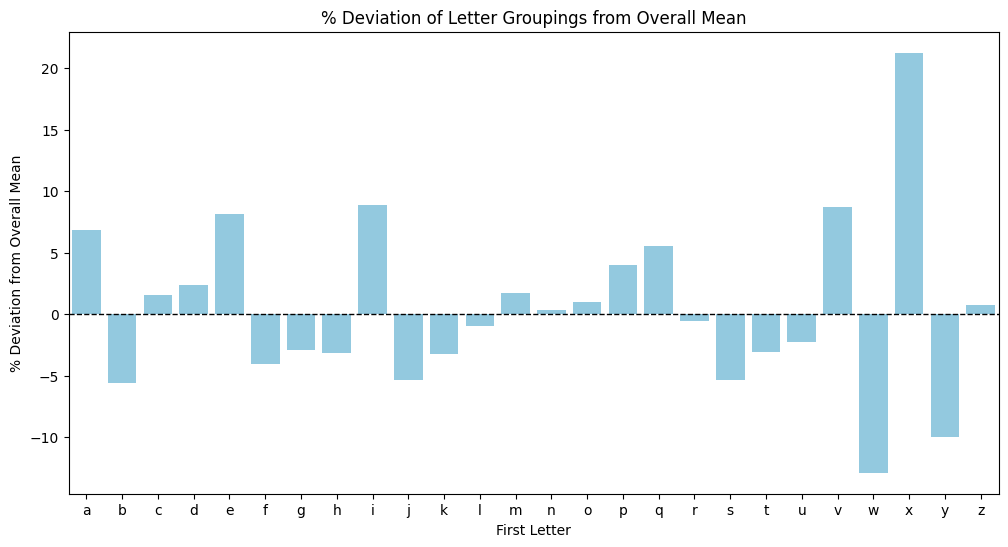

In [25]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar plot
sns.barplot(data=letter_means, x='FirstLetter', y='Deviation %', color='skyblue')

# Add a horizontal line at y=0 to indicate the overall mean
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Set labels and title
plt.xlabel('First Letter')
plt.ylabel('% Deviation from Overall Mean')
plt.title('% Deviation of Letter Groupings from Overall Mean')

# Show the plot
plt.show()


### Dutch AoA

**Category #1 Key Statistics**

*Query #11: Top/Oldest AoA*

In [26]:
df_2.sort_values('Average_AoA', ascending=False)[['Word', 'Translation','Average_AoA', 'Average_%_Known']].head()

,Word,Translation,Average_AoA,Average_%_Known
31160,samovar,NaN,23,11.111111
31159,motet,NaN,20.045455,12.599206
31158,wallingant,NaN,19.75,22.222222
31157,mui,NaN,19.5,11.111111
31156,feut,NaN,19.5,11.111111


*Query #12: Lowest/Youngest AoA*

In [27]:
df_2.sort_values('Average_AoA', ascending=True)[['Word', 'Translation','Average_AoA', 'Average_%_Known']].head()

,Word,Translation,Average_AoA,Average_%_Known
0,mama,NaN,2.044257,100
1,ja,NaN,2.25,100
2,mamma,NaN,2.332547,93.518519
3,papa,NaN,2.336327,100
4,nee,NaN,2.555556,100


*Query #13: Average Word Length*

In [28]:
df_2.sort_values(by='Word', key=lambda x: x.str.len(), ascending=False)[['Word', 'Translation','Average_AoA', 'Average_%_Known']].head()

,Word,Translation,Average_AoA,Average_%_Known
25751,volksvertegenwoordiger,representative,12.5,100
25017,hersenvliesontsteking,meningitis,12.3,100
13313,kruidje-roer-mij-niet,touch-me-not,9.8,87.5
16754,doorzettingsvermogen,NaN,10.5,100
20782,snelheidsovertreding,breach of the speed limit,11.3,100


In [29]:
df_2['Word_Length'] = df_2['Word'].apply(lambda x: len(str(x)))

In [32]:
correlation_coefficient = round((df_2['Word_Length'].corr(df_2['Average_AoA'])),2)
print(f'Correlation Coefficient: {correlation_coefficient}')

AttributeError: 'float' object has no attribute 'shape'

**Category #2 Visualizations**

*Query #16: Grouping by First Letter*

In [33]:
df_2['FirstLetter'] = df_2['Word'].str[0].str.lower()
total_letter_counts = df_2['Word'].groupby(df_2['FirstLetter']).count().reset_index(name='WordCount')

In [34]:
df_2[['Word', 'Translation','Average_AoA', 'Average_%_Known', 'FirstLetter']].head()

,Word,Translation,Average_AoA,Average_%_Known,FirstLetter
0,mama,NaN,2.044257,100,m
1,ja,NaN,2.25,100,j
2,mamma,NaN,2.332547,93.518519,m
3,papa,NaN,2.336327,100,p
4,nee,NaN,2.555556,100,n


*Query #17: Words learned per AoA*

<Axes: xlabel='FirstLetter', ylabel='WordCount'>

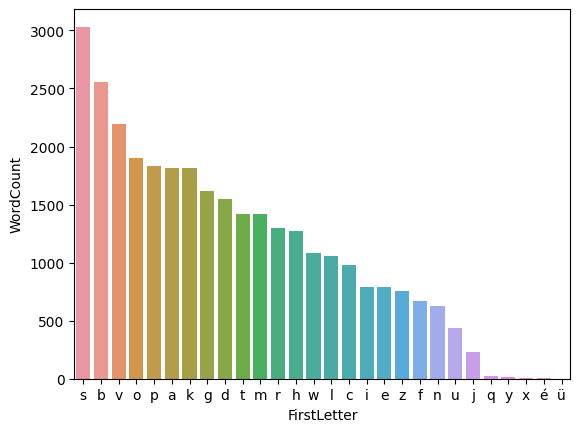

In [35]:
sns.barplot(x='FirstLetter', y='WordCount', data=total_letter_counts,
            order=total_letter_counts.sort_values('WordCount', ascending=False)['FirstLetter'])

*Query #18: ??*

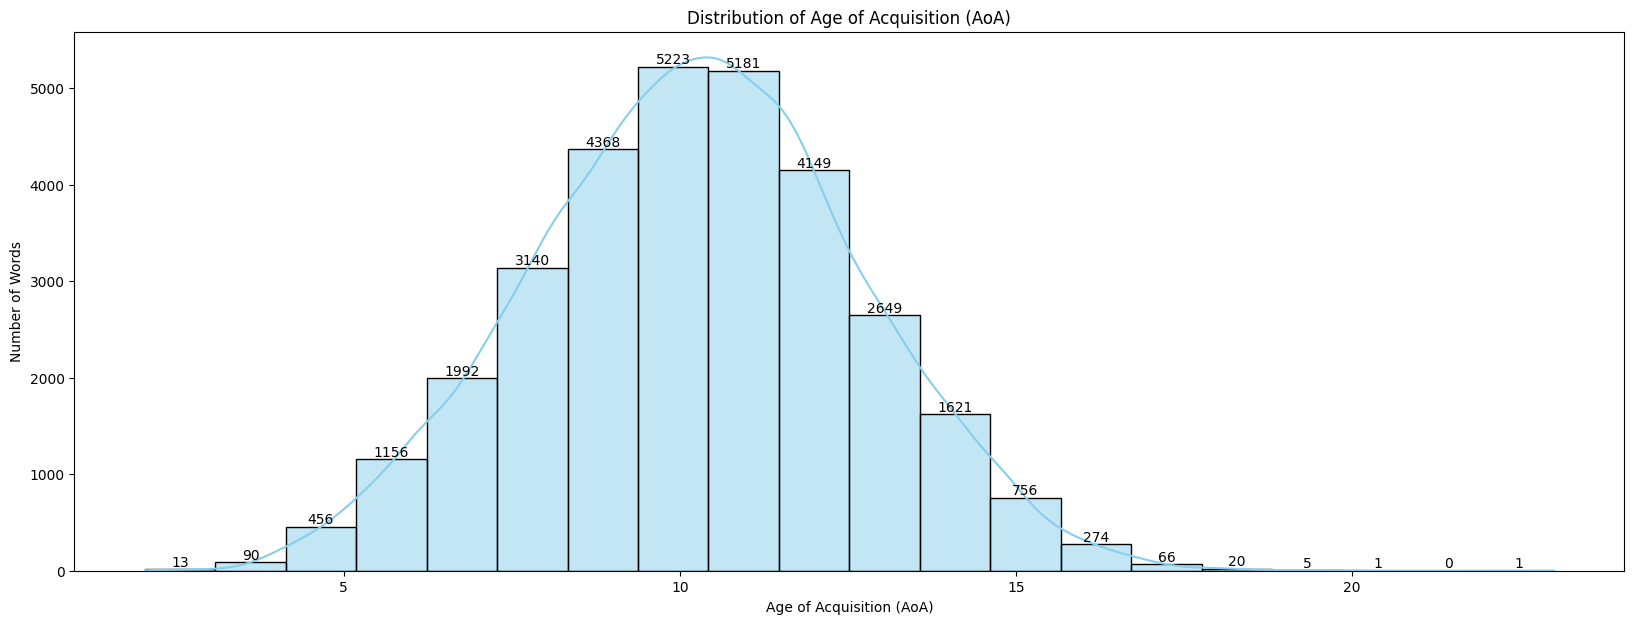

10.95 12.12


In [36]:
# Set the figure size
plt.figure(figsize=(20, 7))

#Create all_words_plot
all_dutch_words_plot = sns.histplot(data=df_2, x='Average_AoA', bins=20, kde=True, color='skyblue')

# Adding counts on top of each bin for all_words_plot
for bar in all_dutch_words_plot.patches:
    height = bar.get_height()
    all_dutch_words_plot.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

plt.title('Distribution of Age of Acquisition (AoA)')
plt.xlabel('Age of Acquisition (AoA)')
plt.ylabel('Number of Words')
plt.show()

# Find the bin with the highest count
max_dutch_bar = max(all_dutch_words_plot.patches, key=lambda x: x.get_height())
max_x_dutch_coordinate_bottom_left = max_dutch_bar.get_x()
max_x_dutch_coordinate_bottom_right = max_dutch_bar.get_x() + max_dutch_bar.get_width()

# Round to two decimal places and print
max_x_dutch_coordinate_bottom_left = round(max_x_coordinate_bottom_left, 2)
max_x_dutch_coordinate_bottom_right = round(max_x_coordinate_bottom_right, 2)
print(max_x_coordinate_bottom_left, max_x_coordinate_bottom_right)


*Query #19: ??*

*Query #20: ??*

### Comparing AoA's through Visualizations

*Query #21: ??*

*Query #22: ??*

*Query #23: ??*

*Query #24: ??*

*Query #25: ??*

## 6. Conclusion